# Validation of the 4x4 scheme with the solitary wave solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
sys.path.append('../nswe')

In [4]:
import nswe_wbmuscl4 as wb4
def fluxes_periodic(h,hu,n):
    nx = h.shape[0]-4
    h0 = np.zeros(nx+6)
    u0 = np.zeros(nx+6)
    d0 = np.zeros(nx+6)

    h0[3:-3] = h[2:-2]
    u0[3:-3] = hu[2:-2] #hu
    u0 = np.where(h0>1e-10,u0/h0,h0)#hu/h
    
    #periodic bcs
    h0[:3] = h0[-6:-3]
    h0[-3:] = h0[3:6]
    u0[:3] = u0[-6:-3]
    u0[-3:] = u0[3:6]
    
    fp, fm, sc = wb4.fluxes_sources(d0,h0,u0,hmin=1e-20)
    return fp

Same case as in section 4.1 of the paper of Bonneton et al. 2011.

First configuration

In [14]:
def solitary(x,t,a0,a1):
    kappa = np.sqrt(3.*a1)/(2.*a0*np.sqrt(a0+a1))
    c = np.sqrt(9.81*(a0+a1))
    h = a0 + a1*np.cosh(kappa*(x-c*t))**(-2)
    u = c*(1.-h0/h)
    return kappa,c,h,u

In [15]:
h0 = 0.5
a = 0.05*h0
L = 30.0
dx = 1.0/8
nx = L/dx+1
xmin = -L/2.
xmax = L/2.

In [16]:
x = np.linspace(-L/2.-2*dx,L/2.+2*dx,nx+4)
np.diff(x)[0]

0.125

In [18]:
kappa,c,h,u = solitary(x,0.0,h0,a)

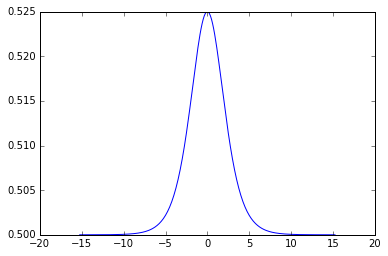

In [19]:
plt.plot(x,h)

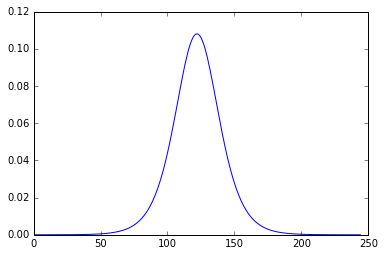

In [20]:
plt.plot(u)

In [21]:
import serre

In [22]:
dx/np.sqrt(9.81*h0)

0.056440455123216361

In [23]:
u2 = np.copy(u)
h2 = np.copy(h)

hall3,uall3,tall3 = serre.splitSerre(x,h,u,0,10.,serre.periodicDomainTwoGC,
                                     serre.periodicDomain2TwoGC,None,None,dx,
                                     nx,vardt = False, dt = 0.01, splitSteps=3,
                                     order=2, periodic=True, fvsolver = fluxes_periodic, 
                                     fdsolver = serre.EFDSolverFM4, ghostcells=2)

CFL = 5.120000


/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide



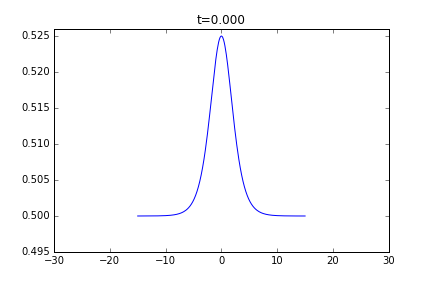
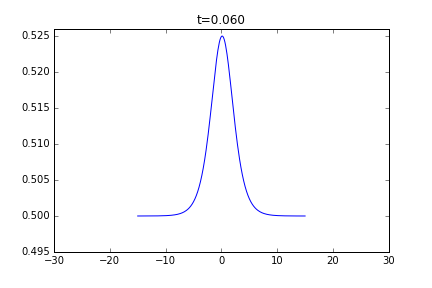
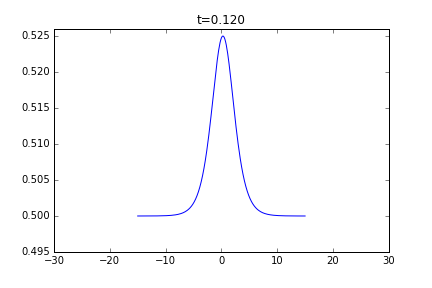
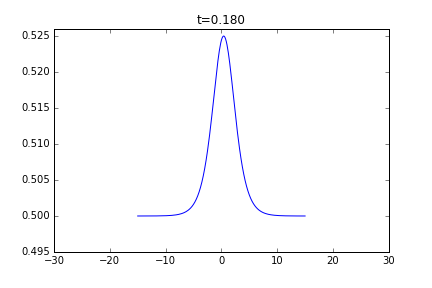
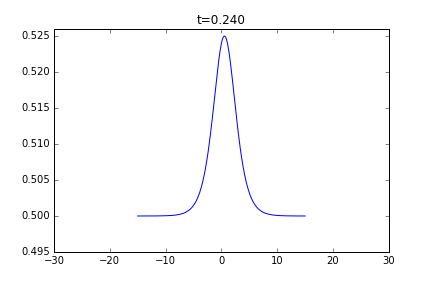
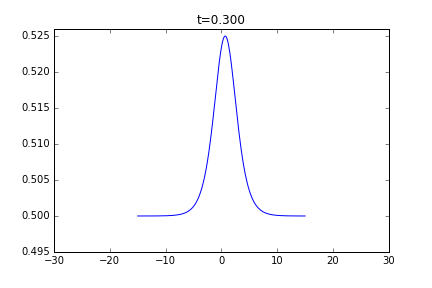
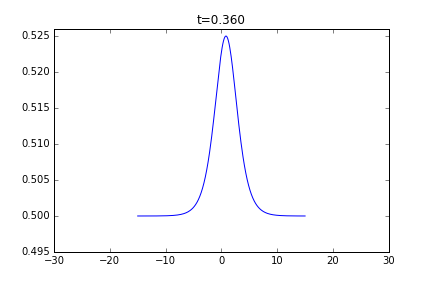
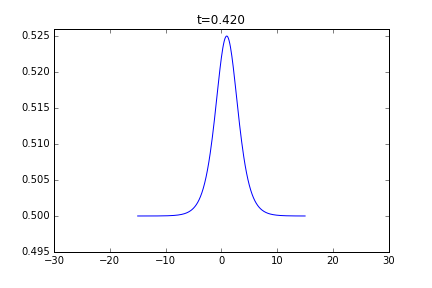
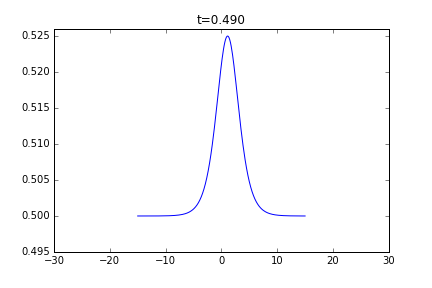
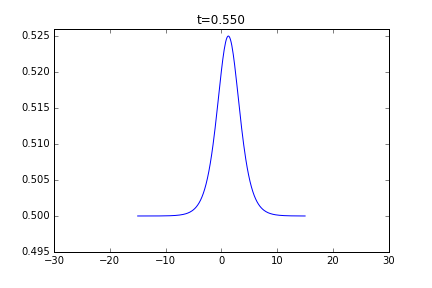
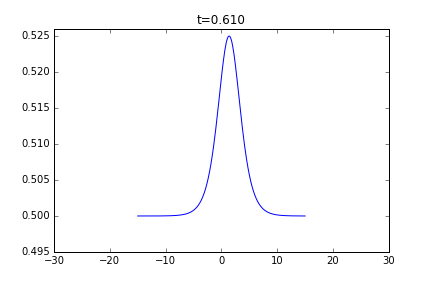
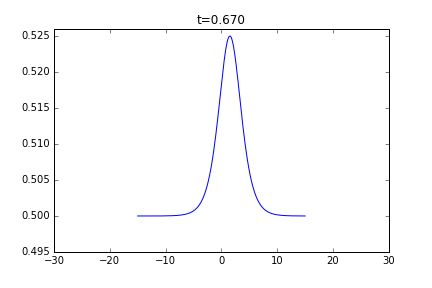
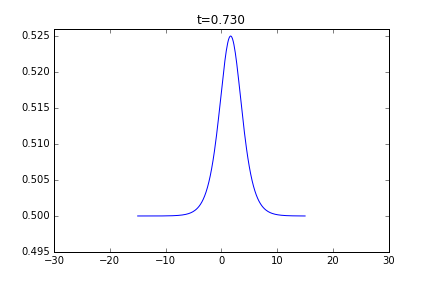
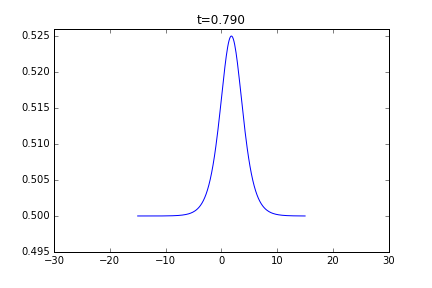
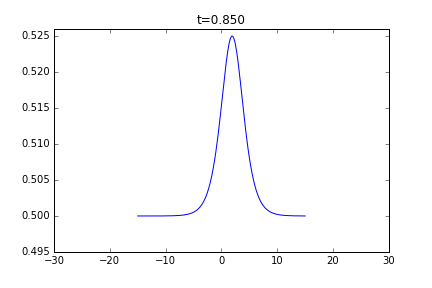
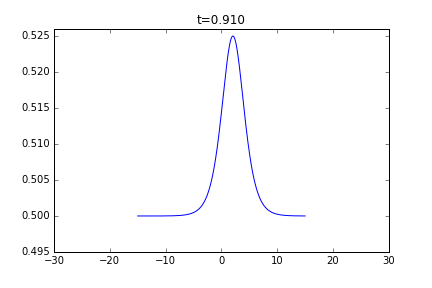
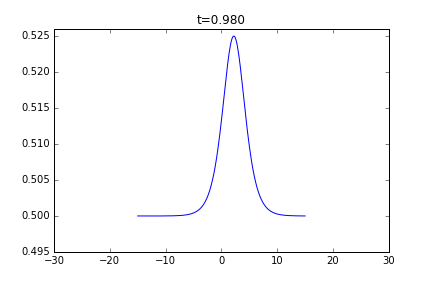
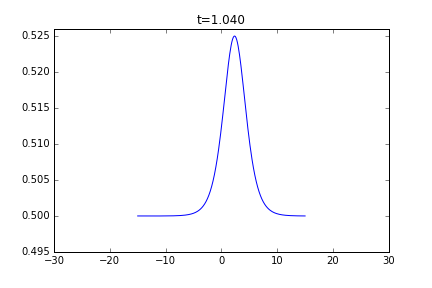
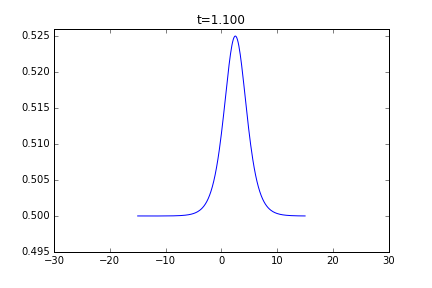
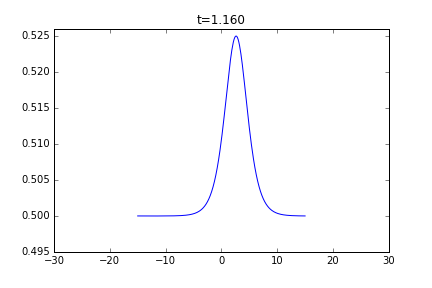
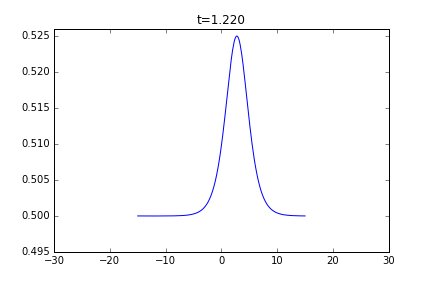
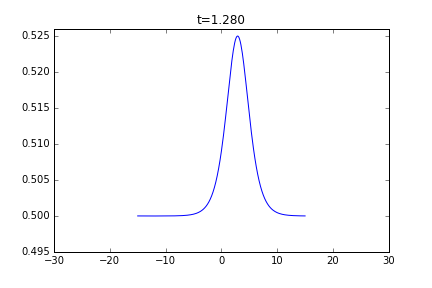
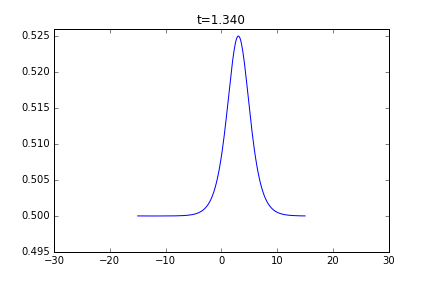
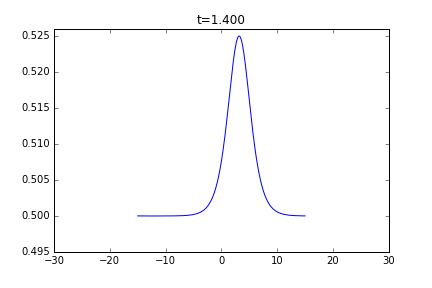
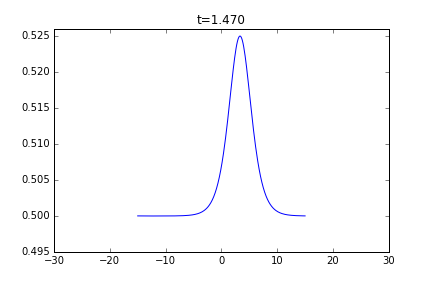
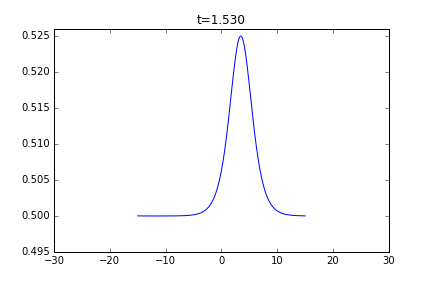
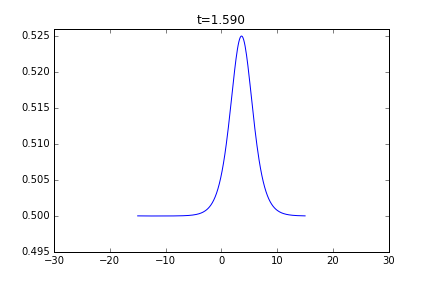
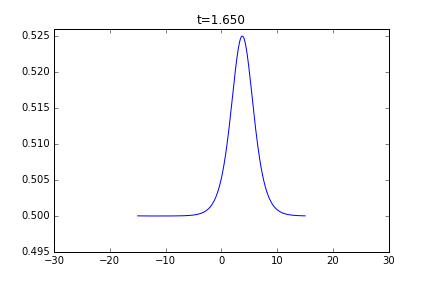
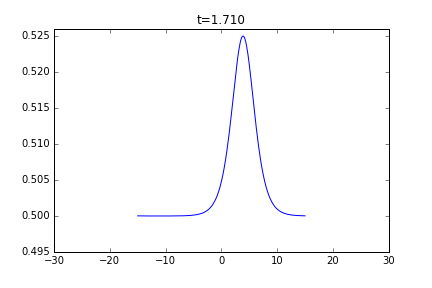
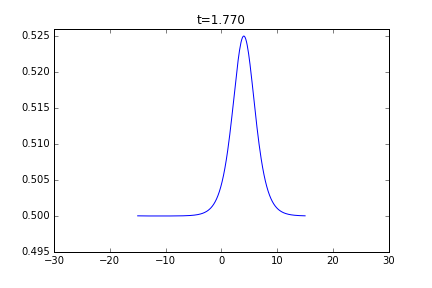
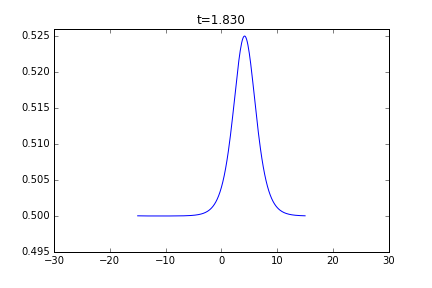
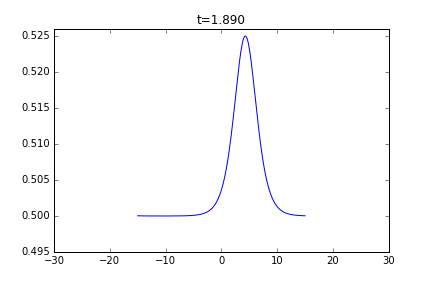
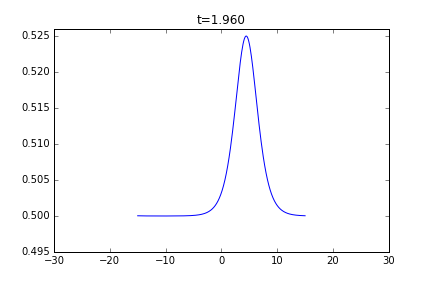
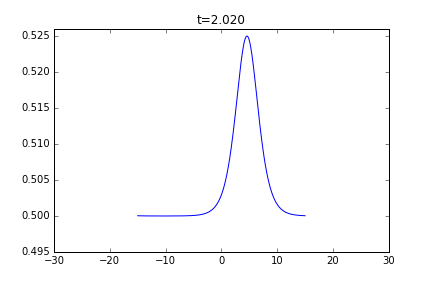
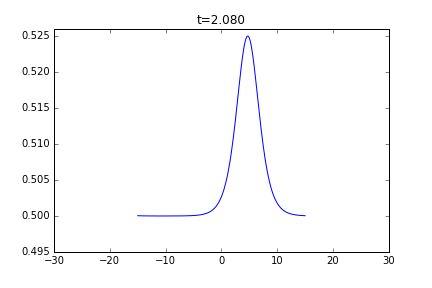
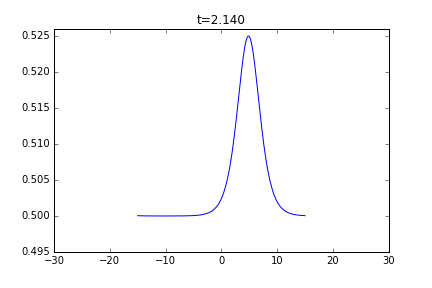
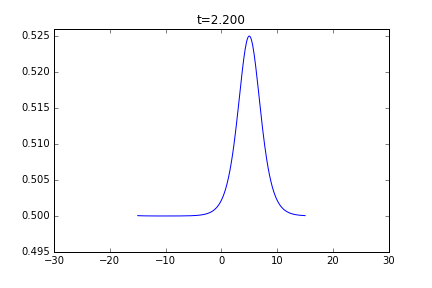
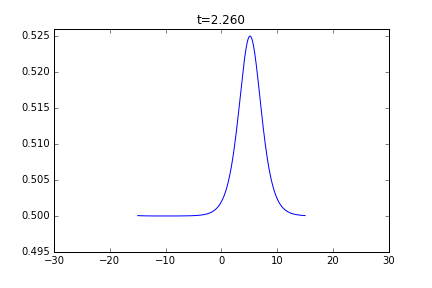
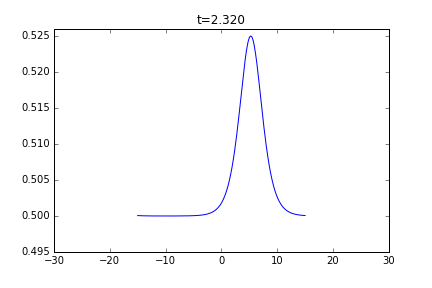
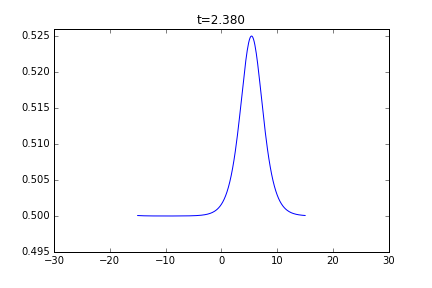

In [24]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes(xlim=(-L,L), ylim=(0.495,0.526))

# lineExact, = ax.plot(x, hallexact[:,0])
# lineSw, = ax.plot(x[2:-2],hall1[2:-2,0])
# lineSerre2, = ax.plot(x[2:-2],hall2[2:-2,0])
lineSerre4, = ax.plot(x[2:-2],hall3[2:-2,0])


ttl = ax.set_title('t=')
# fig.legend((lineExact,lineSw,lineSerre2,lineSerre4),
#            ('exact','nswe2','serre2x4','serre4x4'))
# fig.legend((lineExact,lineSerre4),
#            ('exact','serre4x4'))


def animate(i):
    i = min(tall3.shape[0]-1,i*hall3.shape[0]/40)
    ttl.set_text('t=%.3f'%tall3[i])
    
#     lineExact.set_data(x, hallexact[:,i])
#     lineSw.set_data(x[2:-2],hall2[2:-2,i])
#     lineSerre2.set_data(x[2:-2],hall1[2:-2,i])    
    lineSerre4.set_data(x[2:-2],hall3[2:-2,i])
    

animation.FuncAnimation(fig, animate, frames=40, interval=200)